<a href="https://colab.research.google.com/github/inayan60/PersonalPortifolio/blob/main/Gastos_Joinville_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Despesas Joinville 2025

## Importar bibliotecas

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importar dados do Portal da Transparencia de Joinivlle

- Endereço da API: https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria

In [2]:
url = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria"

- Unidades Orçamentarias
-- Lista com todos os codigos

In [4]:
unidades = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    11, 12, 13, 15, 17, 18, 20, 21,
    22, 23, 24, 27, 28, 29, 30
]

- Usa for para importar todas as unidades da lista "unidades" criada acima e concatena todas no mesmo dataframe.

In [5]:
dfs = []

for cod in unidades:
    params = {
        "periodo_inicial": "01/2025",
        "periodo_final": "08/2025",
        "codigo_unidade": cod
    }
    r = requests.get(url, params=params)
    data = r.json()

    if "registros" in data:
        registros = [r["registro"] for r in data["registros"]]
        df_temp = pd.json_normalize(registros)
        df_temp["codigo_unidade"] = cod
        dfs.append(df_temp)

df_final = pd.concat(dfs, ignore_index=True)

In [6]:
df_final.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,...,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,codigo_unidade
0,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,NaN,0
1,"[{'dataMovimento': '2025-07-08', 'tipoMoviment...",0.82001.15.127.6.3373.0.33903965,15.0,Urbanismo,127.0,Ordenamento Territorial,6.0,Joinville Promissora,3373.0,Gestão de Políticas de Planejamento Urbano - S...,...,Recursos Ordinários,2025.0,82001.0,Secretaria de Pesquisa e Planejamento Urbano -...,0.0,Prefeitura Municipal de Joinville - PMJ,82000.0,Secretaria de Pesquisa e Planejamento Urbano -...,NaN,0
2,"[{'dataMovimento': '2025-08-04', 'tipoMoviment...",0.5001.4.123.3.3164.0.33903645,4.0,Administração,123.0,Administração Financeira,3.0,Joinville Simples,3164.0,Processos administrativos - SEFAZ,...,Recursos Ordinários,2025.0,5001.0,Secretaria da Fazenda - SEFAZ,0.0,Prefeitura Municipal de Joinville - PMJ,5000.0,Secretaria da Fazenda - SEFAZ,NaN,0
3,"[{'dataMovimento': '2025-08-20', 'tipoMoviment...",0.5001.4.123.3.3164.0.33903981,4.0,Administração,123.0,Administração Financeira,3.0,Joinville Simples,3164.0,Processos administrativos - SEFAZ,...,Recursos Ordinários,2025.0,5001.0,Secretaria da Fazenda - SEFAZ,0.0,Prefeitura Municipal de Joinville - PMJ,5000.0,Secretaria da Fazenda - SEFAZ,NaN,0
4,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,NaN,0


In [7]:
df_final.shape

(43406, 33)

## Limpar dataframe

- Lista todas colunas com dados em branco

In [8]:
df_final.isnull().sum()

,0
listMovimentos,0
classificacaoCompleta.classificacaoCompleta,0
despesa.funcao.codigo,0
despesa.funcao.denominacao,0
despesa.subfuncao.codigo,0
despesa.subfuncao.denominacao,0
despesa.programa.codigo,21
despesa.programa.denominacao,21
despesa.acao.codigo,21
despesa.acao.denominacao,21


- Exclui colunas com dados em branco.

In [12]:
not_null_columns = df_final.columns[df_final.notnull().all()]
df_limpa = df_final[not_null_columns]
df_limpa.shape

(43406, 16)

# Criar colunas data e valor

- Separar os elementos da coluna listMovimentos.
-- esta colunas continha os valores de data do movimento e valor sem estrutura.

In [14]:
df_exploded = df_limpa.explode('listMovimentos')
df_exploded = df_exploded.reset_index(drop=True)
df_exploded.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade
0,"{'dataMovimento': '2025-05-28', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
1,"{'dataMovimento': '2025-06-11', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
2,"{'dataMovimento': '2025-06-18', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
3,"{'dataMovimento': '2025-06-26', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
4,"{'dataMovimento': '2025-07-08', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0


- Usar função pd.json_normalize() para criar um novo dataframe com as colunas sepadas criadas anteriormente na df_exploded.

In [15]:
df_movimentos = pd.json_normalize(df_exploded['listMovimentos'])
df_movimentos.head()

,dataMovimento,tipoMovimento,valorMovimento
0,2025-05-28,Emissão de empenho,24505.0
1,2025-06-11,Empenho em liquidação,19227.0
2,2025-06-18,Liquidação de empenho,19227.0
3,2025-06-26,Anulação de empenho,5278.0
4,2025-07-08,Pagamento de empenho,19227.0


- Cria o dataframe df_processada concatenando as colunas criadas e excluindo listmovimentos.

In [18]:
df_processada = pd.concat([df_exploded.drop(columns=['listMovimentos']), df_movimentos], axis=1)
df_processada['dataMovimento'] = pd.to_datetime(df_processada['dataMovimento'])
df_processada["valorMovimento"] = pd.to_numeric(df_processada["valorMovimento"], errors='coerce')
df_processada.head()


,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade,dataMovimento,tipoMovimento,valorMovimento
0,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-05-28,Emissão de empenho,24505.0
1,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-11,Empenho em liquidação,19227.0
2,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-18,Liquidação de empenho,19227.0
3,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-26,Anulação de empenho,5278.0
4,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-07-08,Pagamento de empenho,19227.0


# Plots

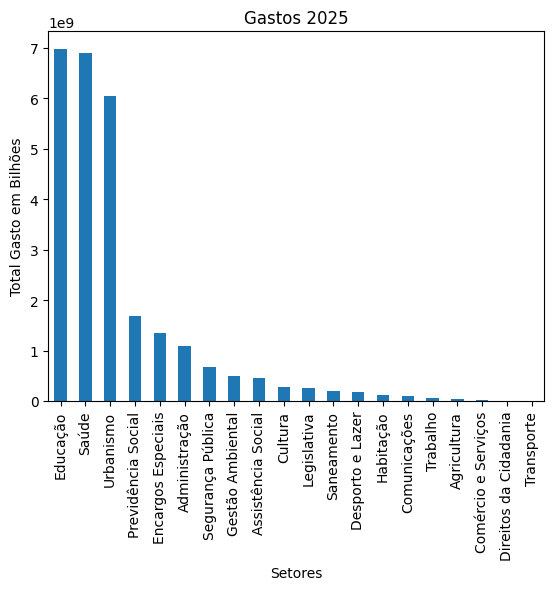

In [21]:
gastos_jlle = df_processada.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_jlle.plot(kind="bar")
plt.ylabel("Total Gasto em Bilhões")
plt.xlabel("Setores")
plt.title("Gastos 2025")
plt.show()

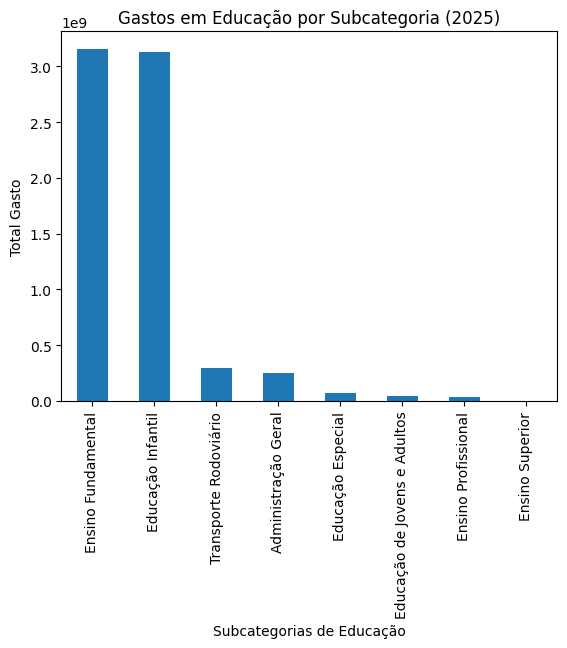

In [50]:
gastos_educacao_fone = df_processada[df_processada['despesa.funcao.denominacao'] == 'Educação']

gastos_fonte_educacao = gastos_educacao.groupby("despesa.subfuncao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_fonte_educacao.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Subcategorias de Educação")
plt.title("Gastos em Educação por Subcategoria (2025)")
plt.show()

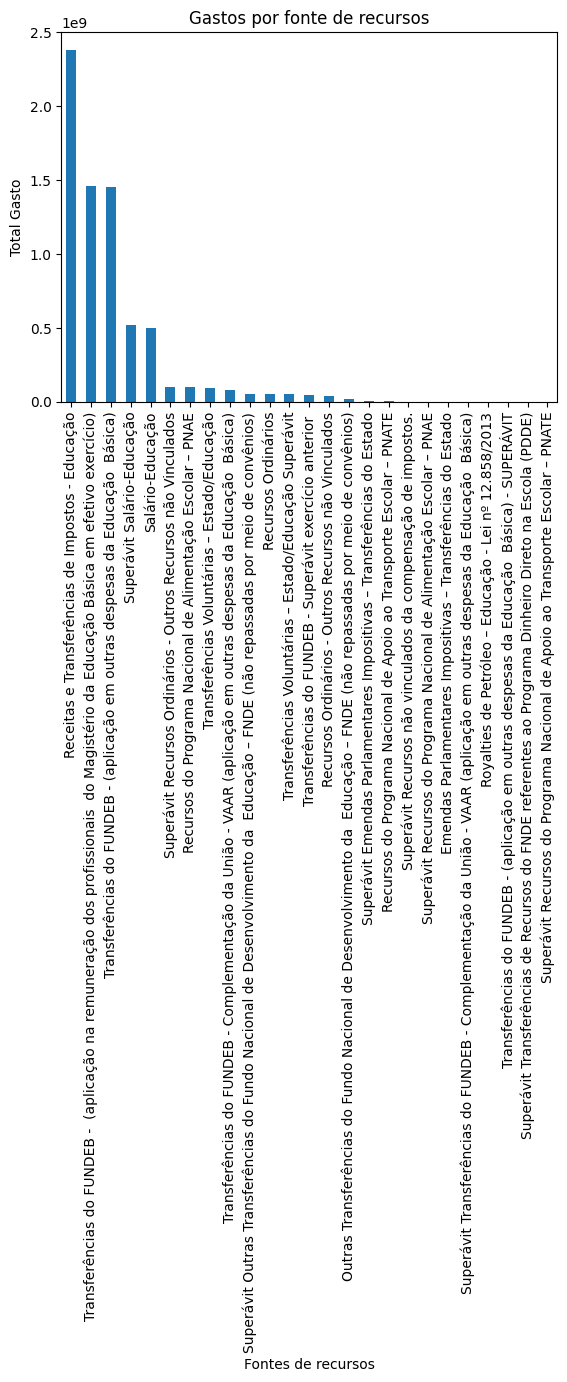

In [28]:
gastos_educacao_ = df_processada[df_processada['despesa.funcao.denominacao'] == 'Educação']

gastos_subfuncao_educacao = gastos_educacao.groupby("fonteRecurso.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_subfuncao_educacao.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Fontes de recursos")
plt.title("Gastos por fonte de recursos")
plt.show()

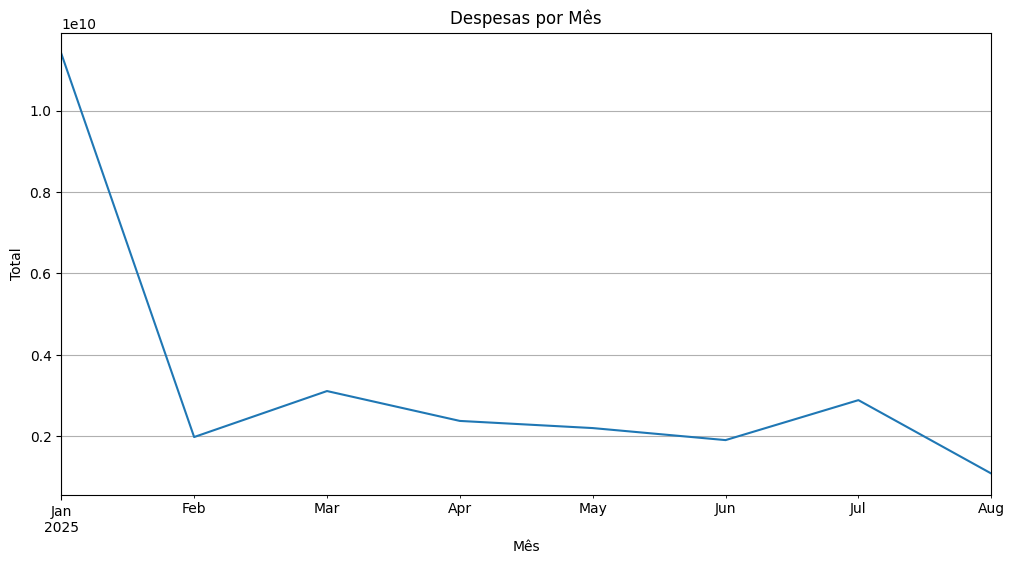

In [29]:
df_processada['month'] = df_processada['dataMovimento'].dt.to_period('M')

depesasmensais = df_processada.groupby('month')['valorMovimento'].sum()

plt.figure(figsize=(12, 6))
depesasmensais.plot(kind='line')
plt.title('Despesas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.grid(True)
plt.show()

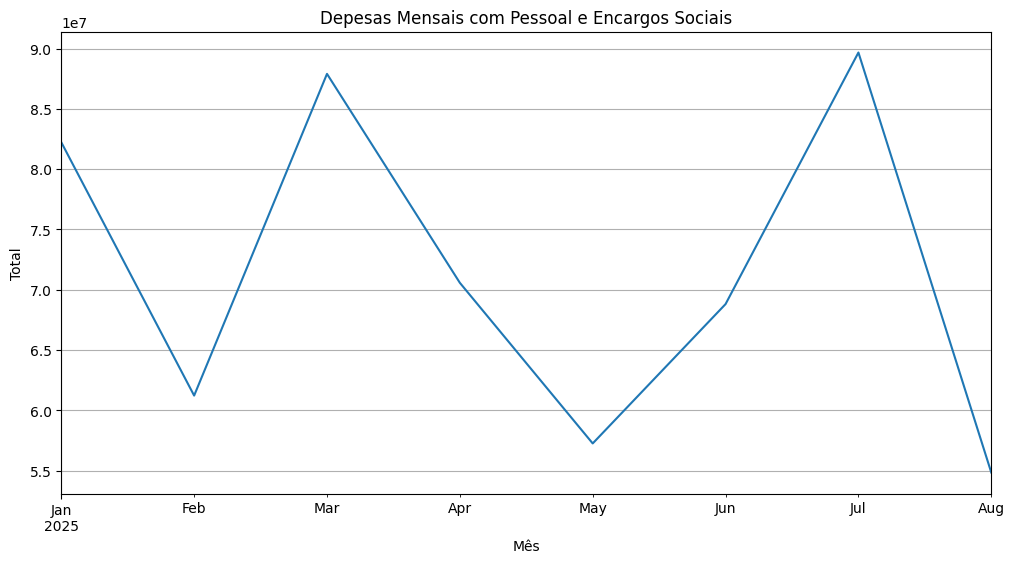

In [44]:
df_merged = df_processada.merge(df_final[['naturezaDespesa.grupo.denominacao']], left_index=True, right_index=True, how='left')

gastos_pessoal = df_merged[df_merged['naturezaDespesa.grupo.denominacao'] == 'Pessoal e Encargos Sociais']

monthly_pessoal_expenses = gastos_pessoal.groupby('month')['valorMovimento'].sum()

plt.figure(figsize=(12, 6))
monthly_pessoal_expenses.plot(kind='line')
plt.title('Depesas Mensais com Pessoal e Encargos Sociais')
plt.xlabel('Mês')
plt.ylabel('Total')
plt.grid(True)
plt.show()

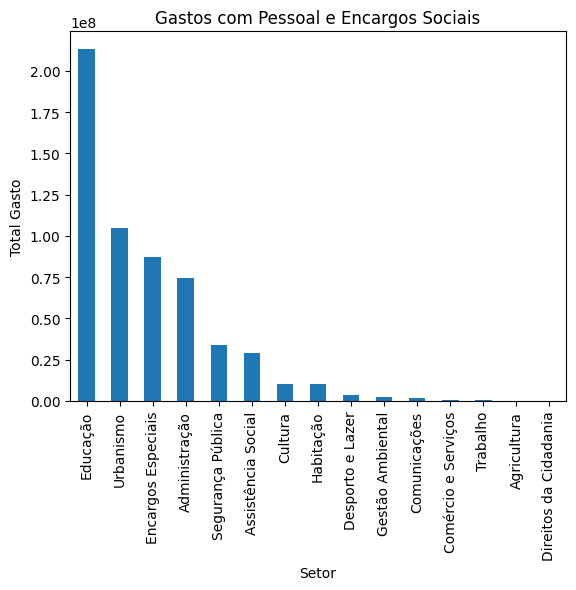

In [54]:
gastos_folha = df_merged[df_merged['naturezaDespesa.grupo.denominacao'] == 'Pessoal e Encargos Sociais']

gastos_fonte_folha = gastos_folha.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_fonte_folha.plot(kind="bar")
plt.ylabel("Total Gasto")
plt.xlabel("Setor")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.show()

/tmp/ipython-input-3670982149.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")


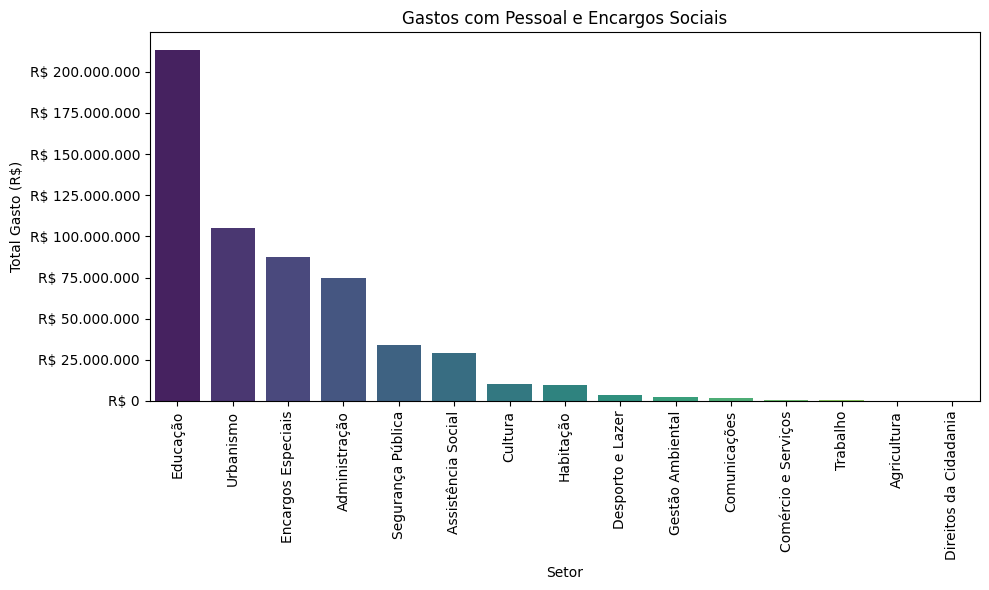

In [56]:
import matplotlib.ticker as mticker

gastos_folha = df_merged[df_merged['naturezaDespesa.grupo.denominacao'] == 'Pessoal e Encargos Sociais']

gastos_fonte_folha = gastos_folha.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gastos_fonte_folha.index, y=gastos_fonte_folha.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Setor")
plt.title("Gastos com Pessoal e Encargos Sociais")
plt.xticks(rotation=90)

# Format y-axis labels
formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/tmp/ipython-input-689135507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_jlle.index, y=gastos_jlle.values, palette="viridis")


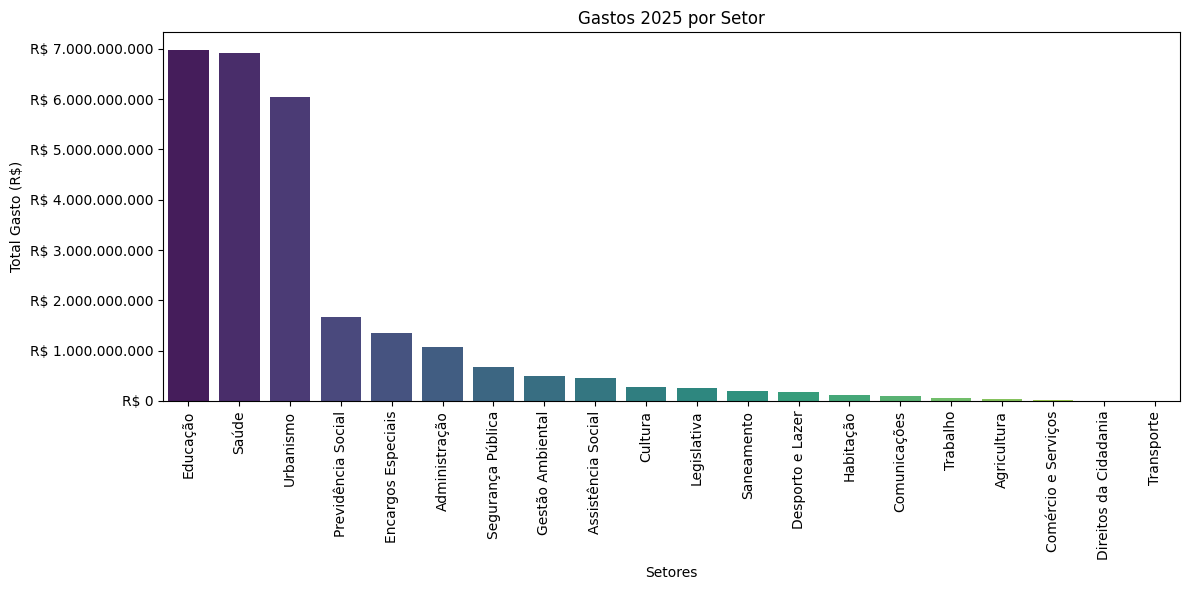

In [57]:
gastos_jlle = df_processada.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gastos_jlle.index, y=gastos_jlle.values, palette="viridis")
plt.ylabel("Total Gasto (R$)")
plt.xlabel("Setores")
plt.title("Gastos 2025 por Setor")
plt.xticks(rotation=90)

# Format y-axis labels
formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2655356799.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_fonte_educacao.values, y=gastos_fonte_educacao.index, palette="viridis") # Swap x and y


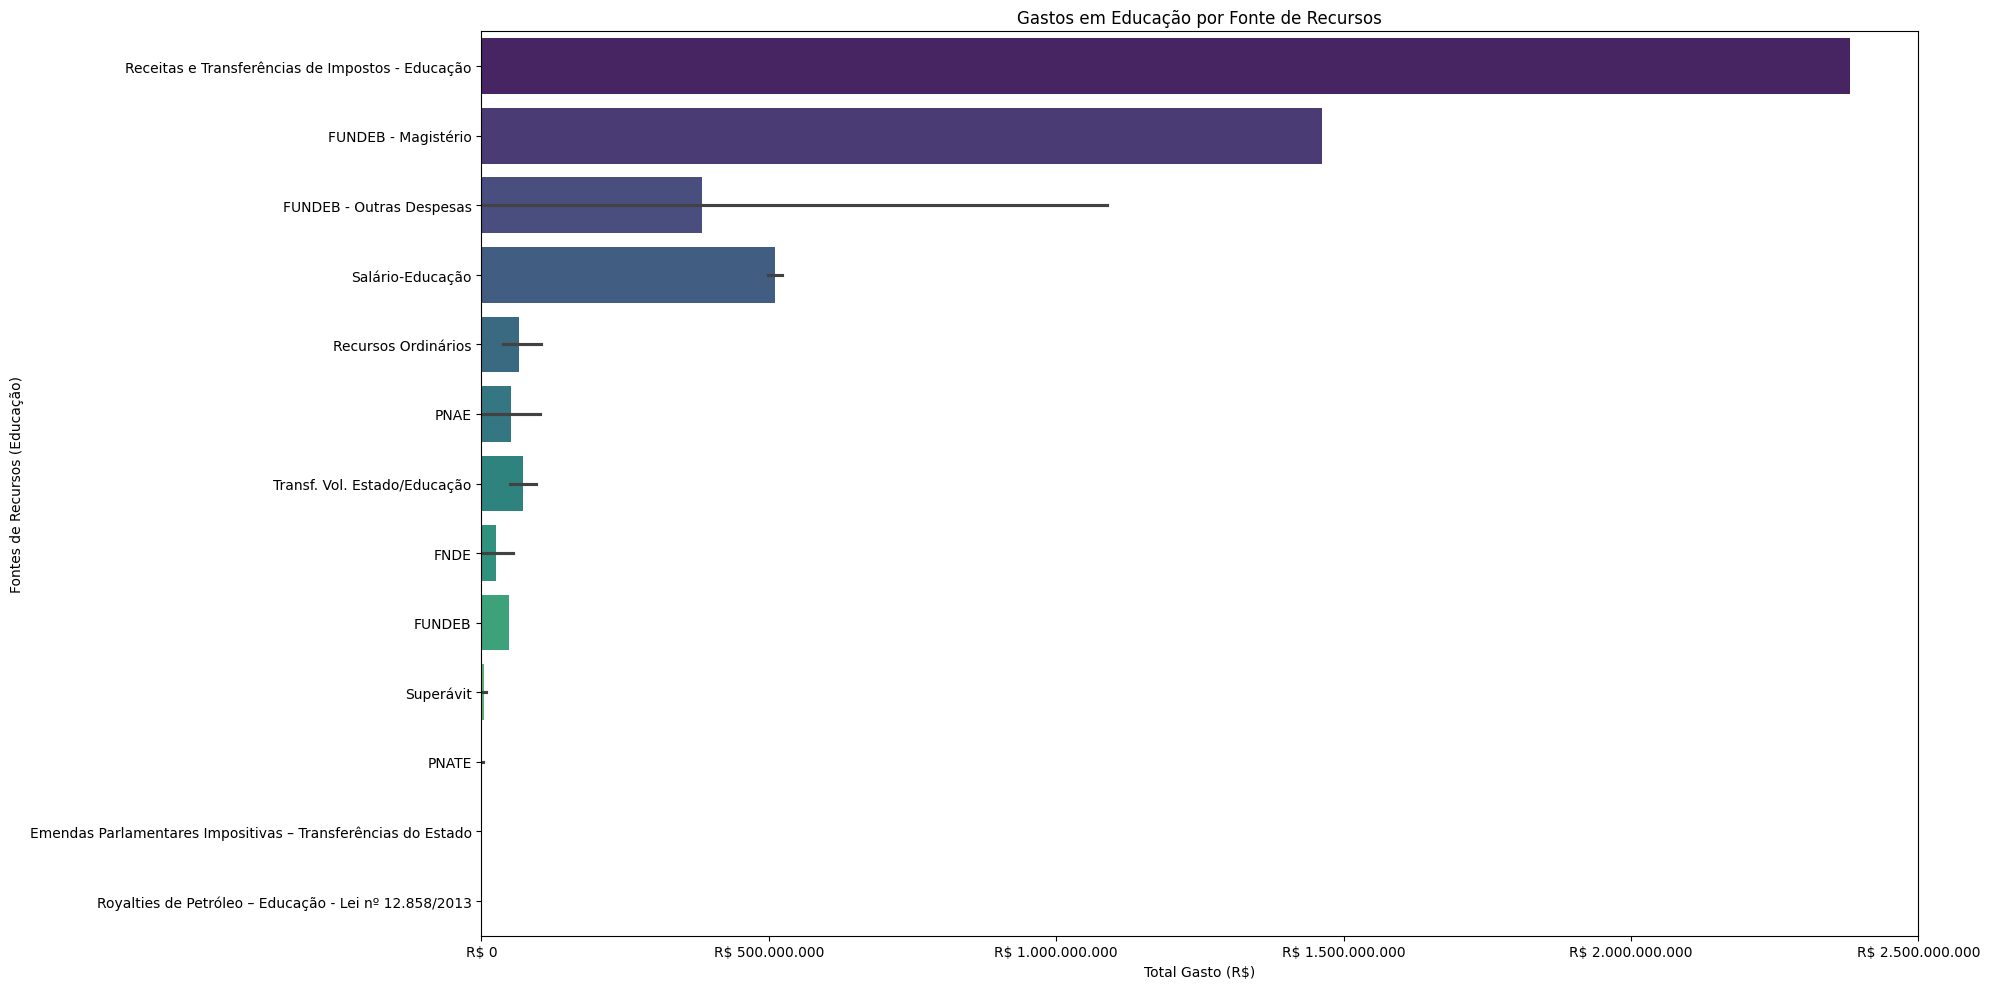

In [66]:
gastos_educacao_ = df_processada[df_processada['despesa.funcao.denominacao'] == 'Educação']

gastos_fonte_educacao = gastos_educacao_.groupby("fonteRecurso.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

# Function to shorten resource names
def shorten_resource_name(name):
    if 'Transferências do FUNDEB' in name:
        if 'Magistério' in name:
            return 'FUNDEB - Magistério'
        elif 'outras despesas' in name:
            return 'FUNDEB - Outras Despesas'
        elif 'Complementação da União - VAAR' in name:
             return 'FUNDEB - VAAR'
        else:
            return 'FUNDEB'
    elif 'Recursos Ordinários' in name:
        return 'Recursos Ordinários'
    elif 'PNATE' in name:
        return 'PNATE'
    elif 'EMENDAS' in name:
        return 'EMENDAS PARLAMENTARES'
    elif 'FNDE' in name:
        return 'FNDE'
    elif 'Salário-Educação' in name:
        return 'Salário-Educação'
    elif 'Programa Nacional de Alimentação Escolar' in name:
        return 'PNAE'
    elif 'Transferências Voluntárias – Estado/Educação' in name:
        return 'Transf. Vol. Estado/Educação'
    elif 'Superávit' in name:
         if 'Salário-Educação' in name:
             return 'Superávit Salário-Educação'
         elif 'Recursos Ordinários' in name:
             return 'Superávit Recursos Ordinários'
         elif 'FUNDEB' in name:
             return 'Superávit FUNDEB'
         elif 'PNATE' in name:
             return 'Superávit PNATE'
         elif 'PNAE' in name:
             return 'Superávit PNAE'
         else:
             return 'Superávit'

    return name


gastos_fonte_educacao.index = gastos_fonte_educacao.index.map(shorten_resource_name)

plt.figure(figsize=(20, 10)) # Adjust figure size for horizontal plot
sns.barplot(x=gastos_fonte_educacao.values, y=gastos_fonte_educacao.index, palette="viridis") # Swap x and y
plt.xlabel("Total Gasto (R$)") # Swap x and y labels
plt.ylabel("Fontes de Recursos (Educação)")
plt.title("Gastos em Educação por Fonte de Recursos")


# Format x-axis labels (since it's horizontal now)
formatter = mticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()